<a href="https://colab.research.google.com/github/Aman2568/python_projects/blob/main/FaceRecognitionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install scikit-learn

In [9]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
import numpy as np
import os, cv2

In [15]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
  plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
  plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
  for i in range(n_row * n_col):
    plt.subplot(n_row, n_col, i + 1)
    plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
    plt.title(titles[i], size=12)
    plt.xticks(())
    plt.yticks(())

In [18]:
dir_name = "dataset/faces"
y=[];X=[];target_names=[]
person_id=0;h=w=300
n_samples=0
class_names=[]
for person_name in os.listdir(dir_name):
  if person_name == '.ipynb_checkpoints':
    continue
  dir_path = dir_name + "/" + person_name + "/" # Add a missing '/'
  class_names.append(person_name)
  for image_name in os.listdir(dir_path):
    image_path = dir_path + image_name
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    resized_image = cv2.resize(gray, (h, w))
    v = resized_image.flatten()
    X.append(v)
    n_samples+=1
    y.append(person_id)
    target_names.append(person_name)
  person_id+=1
y=np.array(y) # Move array conversions outside the loop
X=np.array(X)
target_names=np.array(target_names)
n_features = X.shape[1]
print(y.shape, X.shape, target_names.shape) # Change x to X
print("Number of Samples:", n_samples)
n_classes = target_names.shape[0]
print("Total Dataset Size")
print("Number of Features:", n_features)
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

(450,) (450, 90000) (450,)
Number of Samples: 450
Total Dataset Size
Number of Features: 90000
n_samples: 450
n_features: 90000
n_classes: 450


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Extracting the top 100 eigenfaces from 337 faces


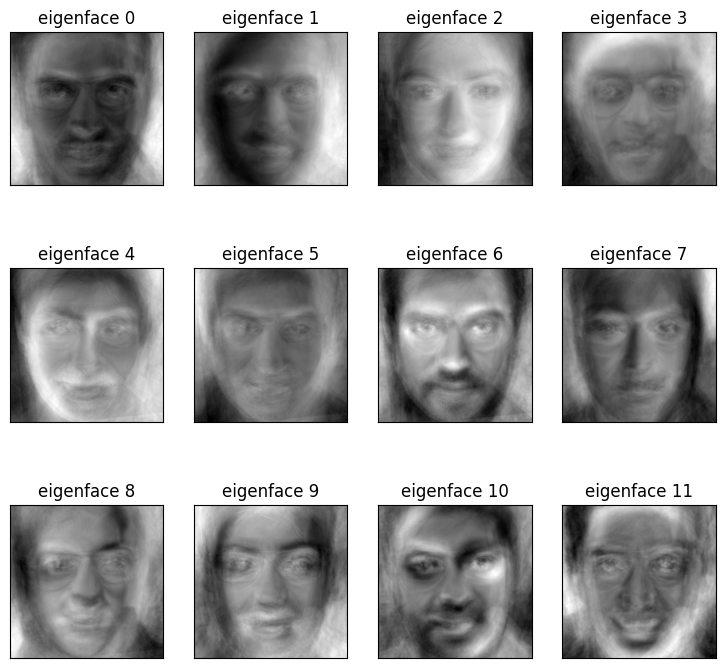

Projecting the input data on the eigenface orthonormal basis
(337, 100) (113, 100)
(337, 8) (113, 8)
Project done


In [22]:
n_components = 100
print("Extracting the top %d eigenfaces from %d faces" % (n_components, X_train.shape[0]))
pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(X_train)
eigenfaces = pca.components_.reshape((n_components, h, w))
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)
plt.show()

print("Projecting the input data on the eigenface orthonormal basis")
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape, X_test_pca.shape)

lda = LinearDiscriminantAnalysis()
lda.fit(X_train_pca, y_train)
X_train_lda = lda.transform(X_train_pca)
X_test_lda = lda.transform(X_test_pca)
print(X_train_lda.shape, X_test_lda.shape)
print("Project done")